# Importando as bibliotecas que serão utilizadas no projeto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base de dados de crédito 
    Fonte(adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

In [48]:
base_credit = pd.read_csv('Bases de dados/credit_data.csv')

In [49]:
base_credit.head() 

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [50]:
base_credit['income'].max() #Achando a pessoa com a maior divida

69995.6855783239

In [51]:
np.unique(base_credit['default'], return_counts=True) #Conta quais são os valores unicos e conta o total de cada um desses valores
                                                      # 283 devedores  

(array([0, 1]), array([1717,  283]))

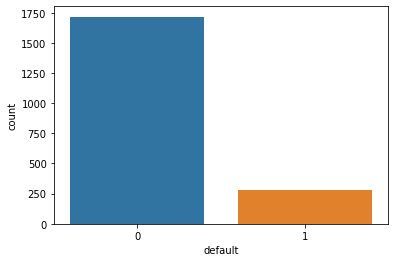

In [63]:
sns.countplot(x = base_credit['default']);

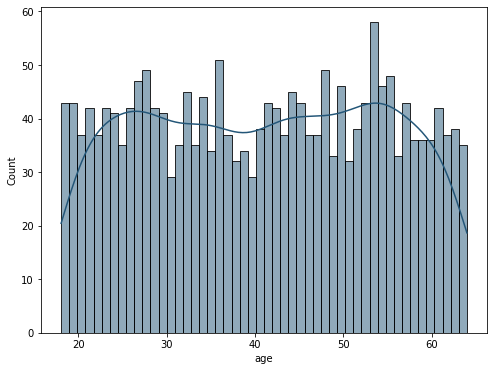

In [64]:
his, ax = plt.subplots(figsize=(8,6))
sns.histplot(base_credit['age'],bins=50, color='#235678',kde=True, ax=ax)
plt.show()
 

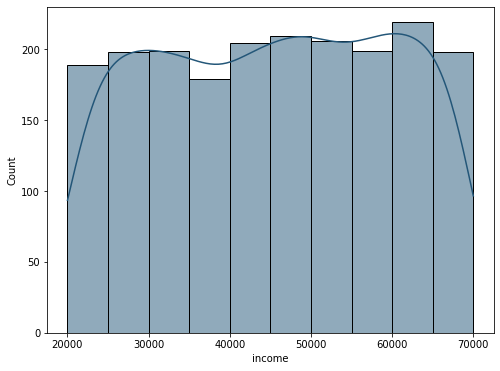

In [65]:
his, ax = plt.subplots(figsize=(8,6))
sns.histplot(base_credit['income'],bins=10, color='#235678',kde=True, ax=ax)
plt.show()

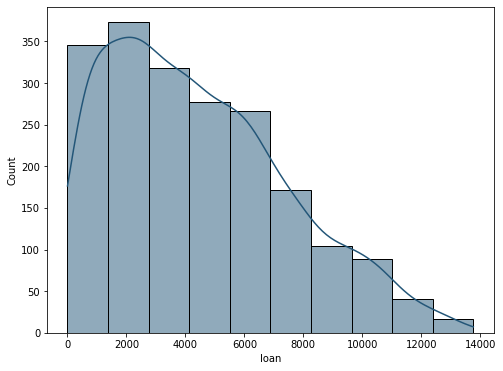

In [66]:
his, ax = plt.subplots(figsize=(8,6))
sns.histplot(base_credit['loan'],bins=10, color='#235678',kde=True, ax=ax)
plt.show()

In [67]:
grafico = px.scatter_matrix(base_credit, dimensions=['age','income','loan'], color = 'default')
grafico.show()

In [56]:
base_credit.loc[base_credit['age'] < 0]
#base_credit[base_credit['age']<0]  Tem o mesmo efeito

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [57]:
# Apagar a coluna inteira (de todos os registros da base de dados) é uma maneira de fazer o tratamento dos dados
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2.head()

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1


In [58]:
#Outra opção é apagar somente os registros com problemas
base_credit3 = base_credit.drop(base_credit[base_credit['age']<0].index)
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


In [59]:
#Podemos preencher os valores faltantes com a média de todas as idades, é um recurso para não causar vies ao algoritmo
#ou o algoritmo rodar de maneira não eficaz
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [60]:
base_credit['age'][base_credit['age'] > 0].mean() # média dos valores sem as inconsistências 

40.92770044906149

In [62]:
#base_credit.loc[base_credit['age'] < 0] = 40.92 Dessa forma atualiza esse valor para todas as outras colunas e queremos somente a coluna age
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92 #Forma correta
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
